# <span style = 'color : blue'> **Tuyet Nhi Nguyen** </span>

## <span style = 'color: Brown'> **I. Bussiness Understanding** <span/>
    (a) The business is anlyzed in this project is a real-estate firm. The purpose of this analysis is to find out when the attribute values of the property are known, the data will return the property's value. By doing that, the company will be able to determine/set the house value more accurately. Besides that, the analysis will detecting outliners and grouping similar variables based on its similiarty among the subjects or a set of speicified characteristics. As a result, by discovering the homogeneous and distinct groups in the database, the company could use those segementations for different purposes such as will identify unsual cluster, or immediately approach/provide a set of houses to a matching client, marketing target based on segmenations, or quickly determine a price range of a house.
    
    (b) Business Questions that we try to get the answer:
        1. What are the relationship of the year built, remodeling year, year sold, the lot area, the overal quality, the number of bedrooms, fullbath, halfbath, gargare cars, and the pool area corelated with the sale price? - Classification type - Supervised learning - Logstic Regression algorithm
        2. Knowning the set of attributes incluing year built, remodeling year, year sold, the lot area, the overal quality, the number of bedrooms, number of fullbaths and halfbath, gargare cars, and the pool area, what is its price? - Regression - Supervised - Linear regression
        3. Better understanding of its dataset - Clustering - Unsupervised - k-means

## <span style = 'color: Brown'> **II. Data Analytic Techniques** <span/>
    In this data analysis project, it's used following analytical techniques:
    1. Multiple linear regression:
        - Independent variables: LotArea, OverallQual, YearBuilt, YearRemodAdd, TotalBsmtSF, CentralAir, FullBath, HalfBath, Bedrooms, GarageCars, PoolArea, YrSold
        - Dependent variable: SalePrice
    2. Logistic regression 
        - Independent variables: all categorical or continuous varibles except SalePrice
        - Dependent variable: SalePrice
    3. Clustering - k-means
    

## <span style = 'color: Brown'> **III. Data Understanding and Exploratory Data Analysis (EDA)** <span/>
    (a) Display descriptive statistics of the data
    (b) Include two or three visualizations for EDA

### <span style = 'color: Brown'> *1. Data Pre-progressing* <span/>


In [490]:
#import python modules (incluing Patsy- Python library for describing statistical models) and given alias 
#enables matplotlib to display the graphical output of the code in the notebook environment
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smmg
import pandas as pd
import numpy as np
import scipy.stats as st
import patsy
from statsmodels.graphics.correlation import plot_corr
from sklearn.model_selection import train_test_split
plt.style.use ('seaborn')

In [491]:
#import pandas library to provide AIPs to store and manipulate Tabular Data
import pandas as pd

#load data into a dataframe named house from a csv file by using .read_csv()
house = pd.read_csv("./desktop/Data/real_estate.csv")

#Df after loading the CSV file - Display the Top 7 Rows
house.head(7)

,LotArea,LandSlope,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,TotalBsmtSF,Heating,CentralAir,FullBath,HalfBath,Bedrooms,KitchenQual,GarageCars,PoolArea,YrSold,SalePrice
0,8450,Gtl,1Fam,2Story,7,2003,2003,Gable,856,GasA,Y,2,1,3,Gd,2,0,2008,208500
1,9600,Gtl,1Fam,1Story,6,1976,1976,Gable,1262,GasA,Y,2,0,3,TA,2,0,2007,181500
2,11250,Gtl,1Fam,2Story,7,2001,2002,Gable,920,GasA,Y,2,1,3,Gd,2,0,2008,223500
3,9550,Gtl,1Fam,2Story,7,1915,1970,Gable,756,GasA,Y,1,0,3,Gd,3,0,2006,140000
4,14260,Gtl,1Fam,2Story,8,2000,2000,Gable,1145,GasA,Y,2,1,4,Gd,3,0,2008,250000
5,14115,Gtl,1Fam,1.5Fin,5,1993,1995,Gable,796,GasA,Y,1,1,1,TA,2,0,2009,143000
6,10084,Gtl,1Fam,1Story,8,2004,2005,Gable,1686,GasA,Y,2,0,3,Gd,2,0,2007,307000


In [492]:
#Display selected attributes of the house df
#house.index
#house.size
#use len function to display the total rows of the house df
#len(house)
#Display total rows and columns
house.shape

(1460, 19)

In [493]:
#Display the columns' names of the df
#list(house) or list(house.columns)
#house.columns.values

#inspect the data types of the columns in the df using the .info() function
house.info()
#house.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
LotArea         1460 non-null int64
LandSlope       1460 non-null object
BldgType        1460 non-null object
HouseStyle      1460 non-null object
OverallQual     1460 non-null int64
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
RoofStyle       1460 non-null object
TotalBsmtSF     1460 non-null int64
Heating         1460 non-null object
CentralAir      1460 non-null object
FullBath        1460 non-null int64
HalfBath        1460 non-null int64
Bedrooms        1460 non-null int64
KitchenQual     1460 non-null object
GarageCars      1460 non-null int64
PoolArea        1460 non-null int64
YrSold          1460 non-null int64
SalePrice       1460 non-null int64
dtypes: int64(12), object(7)
memory usage: 216.8+ KB


In [494]:
#create a subset df containing only the int64 columns by using .select_dtypes function
int_house = house.select_dtypes(include=['int64']).copy()
int_house.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,FullBath,HalfBath,Bedrooms,GarageCars,PoolArea,YrSold,SalePrice
0,8450,7,2003,2003,856,2,1,3,2,0,2008,208500
1,9600,6,1976,1976,1262,2,0,3,2,0,2007,181500
2,11250,7,2001,2002,920,2,1,3,2,0,2008,223500
3,9550,7,1915,1970,756,1,0,3,3,0,2006,140000
4,14260,8,2000,2000,1145,2,1,4,3,0,2008,250000


In [495]:
#create a subset df containing only the object columns
obj_house = house.select_dtypes(include=['object']).copy()
obj_house.head()

,LandSlope,BldgType,HouseStyle,RoofStyle,Heating,CentralAir,KitchenQual
0,Gtl,1Fam,2Story,Gable,GasA,Y,Gd
1,Gtl,1Fam,1Story,Gable,GasA,Y,TA
2,Gtl,1Fam,2Story,Gable,GasA,Y,Gd
3,Gtl,1Fam,2Story,Gable,GasA,Y,Gd
4,Gtl,1Fam,2Story,Gable,GasA,Y,Gd


In [496]:
#Before going any further, check if there are any null values in the data that need to clean up
house.isnull().sum()
#house[house.isnull().any(axis=1)]

#Or can check from the subset dfs that we created obj_house or int_house
#obj_house[obj_house.isnull().any(axis=1)]

#check not null values from the orginal df
#house[house.notnull()]

LotArea         0
LandSlope       0
BldgType        0
HouseStyle      0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
TotalBsmtSF     0
Heating         0
CentralAir      0
FullBath        0
HalfBath        0
Bedrooms        0
KitchenQual     0
GarageCars      0
PoolArea        0
YrSold          0
SalePrice       0
dtype: int64

In [497]:
#In this case, there is no null value as it showed above, so skip this step

#DROP NA VALUES
#Drop the Rows that have NA in Any Cell
#cleaned = house.dropna()

#Drop Only those Rows that have NA in All Cells
# cleaned = house.dropna(how = 'all')

#Drop Columns that have NA in All Cells
#house.dropna(axis = 1, how ='all')

#REPLACE NA VALUES
#Replace all NAs with a constant 
# house = house.fillna(0)

#Replace NA with a constant in specific colunmns
# house = house.fillna({1: 0.5, 2:0})
# or obj_df = obj_df.fillna({"HouseStype": "four"})

#Replace NA with the mean of data values in the column
# data.fillna(data.mean())

#INSERT NA VALUES
# Insert NA in first 5 rows of Col 1 and 3 rows of Col 2
# df.iloc[:5, 1] = NA
# df.iloc[:3, 2] = NA

In [498]:
#Convert the data type - Approach 1
#Check the values in the landslope column
house["CentralAir"].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [499]:
#Create a dictionary for the LandSlope column
cleanup = {"CentralAir": {"Y": 1, "N": 0}}

#using replace function to convert the CentralAir column data type in the house df to number for regression analysis
house = house.replace(cleanup)

#Double check the column conversion
house.CentralAir.head()

#Aproach 2 - Encoding Categorical Data
#Convert the categorical data into numeric values 
#house.CentralAir[house.CentralAir == 'Y'] = 1
#house.CentralAir[house.CentralAir == 'N'] = 0

0    1
1    1
2    1
3    1
4    1
Name: CentralAir, dtype: int64

In [500]:
#Double check to make sure the dtype of CentralAir is converted from object to int64
#the dtype of CentralAir doesn't change in the obj_house df
house.dtypes

LotArea          int64
LandSlope       object
BldgType        object
HouseStyle      object
OverallQual      int64
YearBuilt        int64
YearRemodAdd     int64
RoofStyle       object
TotalBsmtSF      int64
Heating         object
CentralAir       int64
FullBath         int64
HalfBath         int64
Bedrooms         int64
KitchenQual     object
GarageCars       int64
PoolArea         int64
YrSold           int64
SalePrice        int64
dtype: object

In [501]:
#Data Cleaning - check for any duplicated row
house.duplicated()

#Since the result below indicates no duplicated values, skip this part
#Remove duplicate rows if any
#cleaned = house.drop_duplicates()

#Drop duplicates considering a specific column only, ex: HouseStyle
# house.drop_duplicates(['HouseStyle'])

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1430    False
1431    False
1432    False
1433    False
1434    False
1435    False
1436    False
1437    False
1438    False
1439    False
1440    False
1441    False
1442    False
1443    False
1444    False
1445    False
1446    False
1447    False
1448    False
1449    False
1450    False
1451    False
1452    False
1453    False
1454    False
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

In [502]:
#Rename Columns
house = house.rename(columns = {'BldgType': 'PropType', 'KitchenQual': 'KitQual'})
house.head()

#Renaming for the entire Axes
# House_renamed = house.set_index('new name of x')

#Create a df that has 3 rows 4 columns and named them
# house = pd.DataFrame(np.arange(12).reshape((3, 4)), index=['Ohio', 'Colorado', 'New York'], columns=['one', 'two', 'three', 'four'])

#Rename specific index and column
# house.rename(index={'Ohio': 'INDIANA'},columns={'three': 'peekaboo'})

#Reformating the indexes name
# house.rename(index=str.title, columns=str.upper)

#Convert string to all lower or upper case
# house.upper()

#Remove leading and trailing spaces (or lstrip for left side only)
# house.strip()

,LotArea,LandSlope,PropType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,TotalBsmtSF,Heating,CentralAir,FullBath,HalfBath,Bedrooms,KitQual,GarageCars,PoolArea,YrSold,SalePrice
0,8450,Gtl,1Fam,2Story,7,2003,2003,Gable,856,GasA,1,2,1,3,Gd,2,0,2008,208500
1,9600,Gtl,1Fam,1Story,6,1976,1976,Gable,1262,GasA,1,2,0,3,TA,2,0,2007,181500
2,11250,Gtl,1Fam,2Story,7,2001,2002,Gable,920,GasA,1,2,1,3,Gd,2,0,2008,223500
3,9550,Gtl,1Fam,2Story,7,1915,1970,Gable,756,GasA,1,1,0,3,Gd,3,0,2006,140000
4,14260,Gtl,1Fam,2Story,8,2000,2000,Gable,1145,GasA,1,2,1,4,Gd,3,0,2008,250000


In [503]:
#Using concat function for merging Datasets 
#Fully merged
# df_new = pd.concat([df1, df2])

#merged but it has no equivalent in SQL terminalogy
# pd.concat([df1, df2], axis =1)

#Similar to SQL Union
# pd.concat([df1, df2], axis=0)

#INNER Join
# pd.merge(df1, df2, on = 'join column name')

#Full Outer Join
# df.merge(df1, df2, on = 'join column name', how='outer')

#Right/Left Outer Join
# pd.merge(df1, df2, on ='join column name', how = 'right/left')

#Import a df and Define the headers for the data does not have header
# headers = ["wheel_base", "length", "width", "height", "curb_weight", "price"]
#Read in the CSV file and convert "?" to NaN
# df = pd.read_csv("./desktop/Data/real_estate.csv", header=None, names=headers, na_values="?" )

#Create a data frame of 10 rows and 5 columns and filled with random numbers from standard normal distribution
# df = pd.DataFrame(np.random.randn(10, 5))

#Add a twentieth column to the data data frame containing all NAs
# df[20] = NA

#Replace NA with a constant in specific columns
# df1 = df.fillna({1: 0.5, 2: 0})

#Replace NA with a zero in the same data frame
# df.fillna(0, inplace=True)

#Create a Series Values for a single-column data frame
# df = pd.Series([1., NA, 3.5, NA, 7, 6])

#Replacing a series values for a single-column df
#df = pd.Series([1., -999., 2., -999., -1000., 3.])

#Replacing NAN for specific values in a single-column df
#df.replace([-999, -1000], np.nan)

#Replacing NAN and 0 for specific values (pair in order) in a single-column df
#df.replace([-999, -1000], [np.nan, 0])
#df.replace({-999: np.nan, -1000: 0})

#Create a data frame of 7 rows and 2 columns and filled with numbers and strings 
# df = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],'k2': [1, 1, 2, 3, 3, 4, 4]})

# Add a column, named "new", of values in 0-7 range
# df['new'] = range(7)


In [504]:
#Prepare for clustering analysis
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#using the int_house numeric subset df
num_scaled = scaler.fit_transform(int_house)

#show scaled dataset values
# num_scaled

#show scaled dataset shape
num_scaled.shape

(1460, 12)

### <span style = 'color: Brown'> *2. Data Analysis* <span/>
    

In [505]:
#Import numpy library to works with the Numerical Data
import numpy as np
#Using .describe() to calculate simple statistic for numeric fields and using .T function to tranpose the output to better layout
house.describe(include=[np.number]).T
#house.describe()

,count,mean,std,min,25%,50%,75%,max
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
CentralAir,1460.0,0.934932,0.246731,0.0,1.00,1.0,1.00,1.0
FullBath,1460.0,1.565068,0.550916,0.0,1.00,2.0,2.00,3.0
HalfBath,1460.0,0.382877,0.502885,0.0,0.00,0.0,1.00,2.0
Bedrooms,1460.0,2.866438,0.815778,0.0,2.00,3.0,3.00,8.0
GarageCars,1460.0,1.767123,0.747315,0.0,1.00,2.0,2.00,4.0


In [506]:
#Check Correlation among the entire dataset
house.corr()

#Or we can check the correlation among selected columns
#house[['LotArea', 'OverallQual','YearBuilt', 'YearRemodAdd,'TotalBsmtSF', 'CentralAir', 'FullBath', 'HalfBath','Bedrooms', 'GarafeCars', 'PoolAear', 'YrSold', 'SalePrice']].corr()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,CentralAir,FullBath,HalfBath,Bedrooms,GarageCars,PoolArea,YrSold,SalePrice
LotArea,1.000000,0.105806,0.014228,0.013788,0.260833,0.049755,0.126031,0.014259,0.119690,0.154871,0.077672,-0.014261,0.263843
OverallQual,0.105806,1.000000,0.572323,0.550684,0.537808,0.272038,0.550600,0.273458,0.101676,0.600671,0.065166,-0.027347,0.790982
YearBuilt,0.014228,0.572323,1.000000,0.592855,0.391452,0.381831,0.468271,0.242656,-0.070651,0.537850,0.004950,-0.013618,0.522897
YearRemodAdd,0.013788,0.550684,0.592855,1.000000,0.291066,0.298878,0.439046,0.183331,-0.040581,0.420622,0.005829,0.035743,0.507101
TotalBsmtSF,0.260833,0.537808,0.391452,0.291066,1.000000,0.207958,0.323722,-0.048804,0.050450,0.434585,0.126053,-0.014969,0.613581
CentralAir,0.049755,0.272038,0.381831,0.298878,0.207958,1.000000,0.109326,0.134637,0.007872,0.233726,0.018122,-0.009420,0.251328
FullBath,0.126031,0.550600,0.468271,0.439046,0.323722,0.109326,1.000000,0.136381,0.363252,0.469672,0.049604,-0.019669,0.560664
HalfBath,0.014259,0.273458,0.242656,0.183331,-0.048804,0.134637,0.136381,1.000000,0.226651,0.219178,0.022381,-0.010269,0.284108
Bedrooms,0.119690,0.101676,-0.070651,-0.040581,0.050450,0.007872,0.363252,0.226651,1.000000,0.086106,0.070703,-0.036014,0.168213
GarageCars,0.154871,0.600671,0.537850,0.420622,0.434585,0.233726,0.469672,0.219178,0.086106,1.000000,0.020934,-0.039117,0.640409


In [509]:

#import sklearn package to provide APIs for processing data and training machine learning algorithms
from sklearn.model_selection import train_test_split

# Create a list of variables are most relevant and the saleprice
feature_cols = ['LotArea', 'OverallQual','YearBuilt', 'YearRemodAdd',
                'TotalBsmtSF', 'CentralAir', 'FullBath', 'HalfBath',
                'Bedrooms', 'GarageCars', 'PoolArea', 'YrSold']
# Create a data frame x for expalanatory variables and data frame y for target variable
X = house[feature_cols]
y = house.SalePrice

#Divide the DataFrame, slipt x and y into training and test sets
# Split the dataset for taining and testing using 75% and 25% split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=99)

# Look at a few rows from the training dataset explanatory and target variables
X_train.head(), y_train.head()

(      LotArea  OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  CentralAir  \
 213     13568            5       1995          1995          990           1   
 536      8924            7       1998          1999          880           1   
 1432    10800            4       1927          2007          656           1   
 1012    10592            6       1923          1996          602           1   
 769     53504            8       2003          2003         1650           1   
 
       FullBath  HalfBath  Bedrooms  GarageCars  PoolArea  YrSold  
 213          1         0         3           2         0    2006  
 536          2         1         3           2         0    2008  
 1432         2         0         4           1         0    2007  
 1012         1         1         3           1         0    2007  
 769          3         1         4           3         0    2010  ,
 213     156000
 536     188000
 1432     64500
 1012    165000
 769     538000
 Name: SalePrice, dtype

In [510]:
#Skip sklearn metrics classification_report part

# y_predict = logmodel.predict(X_test)
#fit the model (using the default parameters)
# logreg = LogisticRegression(max_iter=1000).fit(X_train,y_train)
#fit the model (using the default parameters)
# logreg = LogisticRegression(max_iter=1000).fit(X_train,y_train)
#predict using the fitted model
# y_pred=logreg.predict(X_test)

#Evalute the model using confusion matrix
#Note: rows 0 1nd 1 show actual and predicted outcomes
# from sklearn.metrics import classification_report
# print(classification_report(y_test,y_pred))

In [511]:
import scipy.stats as st
import statsmodels.formula.api as smf
#Using the Statsmodels formula API and fit function
model = smf.ols('SalePrice ~ LotArea + OverallQual + YearBuilt + YearRemodAdd + TotalBsmtSF + CentralAir + FullBath + HalfBath + Bedrooms + GarageCars + PoolArea + YrSold', house).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     352.0
Date:                Wed, 02 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:27:51   Log-Likelihood:                -17547.
No. Observations:                1460   AIC:                         3.512e+04
Df Residuals:                    1447   BIC:                         3.519e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -3.623e+04    1.6e+06     -0.023   

In [516]:
#Prediction of the sale price
prediction = model.predict(house)
prediction.head()

0    217847.781501
1    187984.859208
2    222943.945140
3    196440.236399
4    278915.812540
dtype: float64

In [517]:
prediction.sum()

264144946.00000167

### <span style = 'color: Brown'> *3. Quality of the Model* <span/>

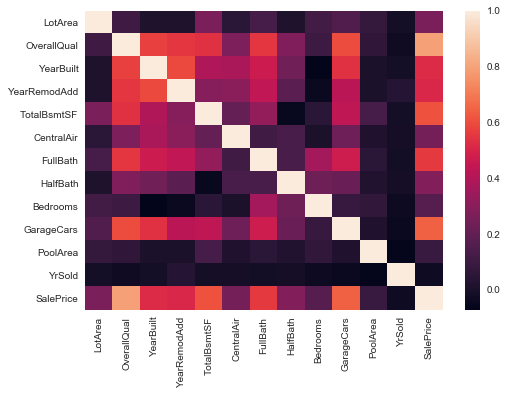

In [507]:
# Create a heat map of the correlations to visually inspect the result
#Import matplotlib for a plotting library - general-purpose GUI toolkits
#Import seaborn library for data visualization, it's based on matplotlib.
#It provides a high-level interface for drawing attractive and informative statistical graphics
import matplotlib as mpl
import seaborn as sns

# The white color squares represent perfect correlation
# Darker colors represent lower correlation and lighter colors higher correlations
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
#sns.heatmap(house.corr())

In [508]:
#A heatmap of the Correlation of the dataset
house.corr().style.background_gradient(cmap='coolwarm')

,LotArea,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,CentralAir,FullBath,HalfBath,Bedrooms,GarageCars,PoolArea,YrSold,SalePrice
LotArea,1,0.105806,0.0142277,0.0137884,0.260833,0.0497549,0.126031,0.0142595,0.11969,0.154871,0.0776724,-0.0142614,0.263843
OverallQual,0.105806,1,0.572323,0.550684,0.537808,0.272038,0.5506,0.273458,0.101676,0.600671,0.0651658,-0.0273467,0.790982
YearBuilt,0.0142277,0.572323,1,0.592855,0.391452,0.381831,0.468271,0.242656,-0.0706512,0.53785,0.00494973,-0.0136177,0.522897
YearRemodAdd,0.0137884,0.550684,0.592855,1,0.291066,0.298878,0.439046,0.183331,-0.0405809,0.420622,0.00582937,0.0357432,0.507101
TotalBsmtSF,0.260833,0.537808,0.391452,0.291066,1,0.207958,0.323722,-0.0488037,0.05045,0.434585,0.126053,-0.0149686,0.613581
CentralAir,0.0497549,0.272038,0.381831,0.298878,0.207958,1,0.109326,0.134637,0.00787172,0.233726,0.0181217,-0.00941964,0.251328
FullBath,0.126031,0.5506,0.468271,0.439046,0.323722,0.109326,1,0.136381,0.363252,0.469672,0.0496038,-0.0196688,0.560664
HalfBath,0.0142595,0.273458,0.242656,0.183331,-0.0488037,0.134637,0.136381,1,0.226651,0.219178,0.0223815,-0.0102687,0.284108
Bedrooms,0.11969,0.101676,-0.0706512,-0.0405809,0.05045,0.00787172,0.363252,0.226651,1,0.0861064,0.0707026,-0.0360139,0.168213
GarageCars,0.154871,0.600671,0.53785,0.420622,0.434585,0.233726,0.469672,0.219178,0.0861064,1,0.0209335,-0.0391169,0.640409


Based on the heatmaps of the correlation, we found that there are certain factors have high positive correlation with the sale price such as OverallQual, YearBuilt, YearRemodAdd, TotalBsmtSF, FullBath, and GarageCars.
Similarly, the OverallQual is affected by YearBuilt, YearRemodAdd, TotalBsmtSF, FullBath, and GarageCars.

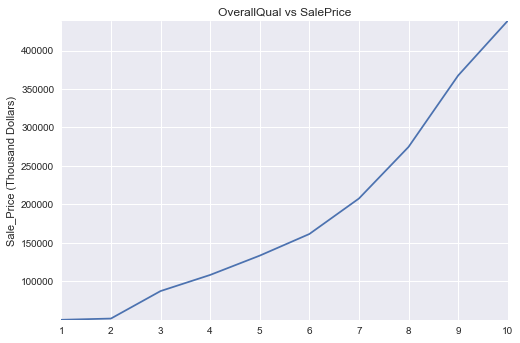

In [560]:
Sale_Price_History = house.loc[:,['YearBuilt', 'SalePrice', 'LotArea', 'OverallQual', 'YearRemodAdd',
                                  'TotalBsmtSF', 'CentralAir', 'FullBath', 'HalfBath',
                                  'Bedrooms', 'GarageCars', 'PoolArea', 'YrSold']].groupby('OverallQual')
avgs = Sale_Price_History.mean()
x = avgs.index
y1 = avgs.SalePrice
#define variables and a method to reduce the code
def plot (x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

#Plot
fig, ax = plt.subplots()
plot(x, y1, ax, "OverallQual vs SalePrice", 'Sale_Price (Thousand Dollars)')

As high positive correlation, the better the house overall quality, the higher price of the property.

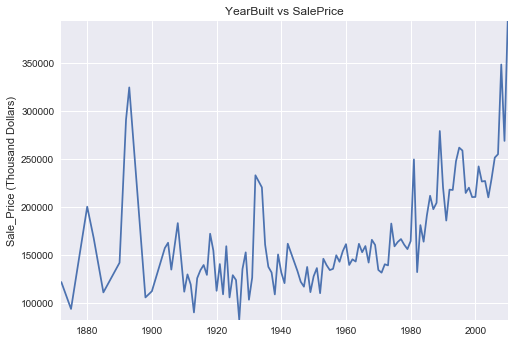

In [562]:
#Usining groupby function to group the independent attrivutes based on YearBuilt
#Visualize the Avergage values between YearBuilt vs SalePrice
Sale_Price_History = house.loc[:,['YearBuilt', 'SalePrice', 'LotArea', 'OverallQual', 'YearRemodAdd',
                                  'TotalBsmtSF', 'CentralAir', 'FullBath', 'HalfBath',
                                  'Bedrooms', 'GarageCars', 'PoolArea', 'YrSold']].groupby('YearBuilt')
avgs = Sale_Price_History.mean()
x = avgs.index
y1 = avgs.SalePrice
#define variables and a method to reduce the code
def plot (x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

#Plot
fig, ax = plt.subplots()
plot(x, y1, ax, "YearBuilt vs SalePrice", 'Sale_Price (Thousand Dollars)')

Based on the graph, the correlation between sale price and the year built the house do not stable, however, the pattern indicates that the houses that were built after 1980 could potentially sale at higher price. There is an outliner for the pricing house in 1980s and 1930s, this need more data (such as the market, economic of those year) and further analysis in order to explain why the pricing were jummped expressively.

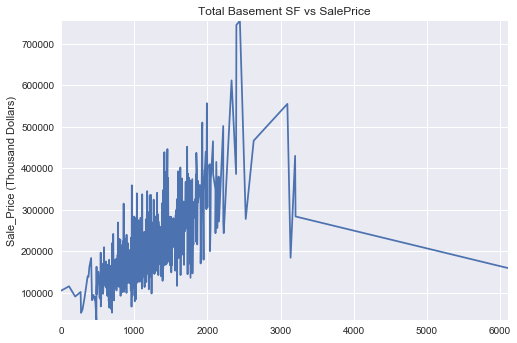

In [564]:
Sale_Price_History = house.loc[:,['YearBuilt', 'SalePrice', 'LotArea', 'OverallQual', 'YearRemodAdd',
                                  'TotalBsmtSF', 'CentralAir', 'FullBath', 'HalfBath',
                                  'Bedrooms', 'GarageCars', 'PoolArea', 'YrSold']].groupby('TotalBsmtSF')
avgs = Sale_Price_History.mean()
x = avgs.index
y1 = avgs.SalePrice
#define variables and a method to reduce the code
def plot (x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

#Plot
fig, ax = plt.subplots()
plot(x, y1, ax, "Total Basement SF vs SalePrice", 'Sale_Price (Thousand Dollars)')

Based on the graph, we can say if the basement sf from 0 to 2500sf is highly possitive correlation with the sale price, however, there are outliner group, after 2500sf the pricing is decreased, this could be explained by other factors such as OverallQual of the house.

In [565]:
#penguins = sns.load_dataset("penguins")
# sns.pairplot(penguins)

#Assigning a hue variable adds a semantic mapping and changes the default marginal plot to a layered kernel density estimate (KDE)
# sns.pairplot(penguins, hue="species")

#sns.pairplot(penguins, hue="species", diag_kind="hist")

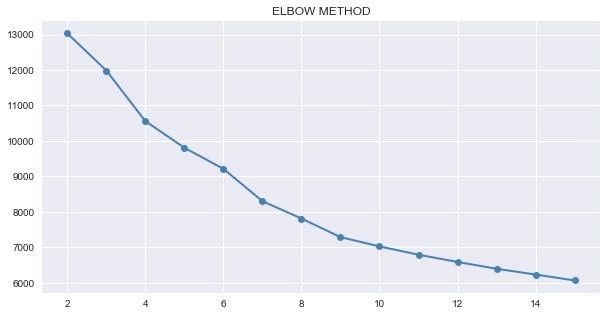

In [566]:
#Performing k-mean clustering
#First, use the Elbow method to determine optimal number of clusters
from sklearn.cluster import KMeans

# NOTE: Inertia refers to within cluster sum of squares (WCSS)
inertias = []

for i in range(2,16):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(num_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.title('ELBOW METHOD')
plt.plot(np.arange(2,16),inertias, marker='o', lw=2, color='steelblue');

Based on the Elbow method and the within cluster sum of squares (WCSS), it indicates 4 clusters would be the best option in this case.

In [568]:
# Based on the Elbow, fit the clustering model for 4 clusters
km = KMeans(n_clusters=4, random_state=0)
clusters = km.fit_predict(num_scaled)

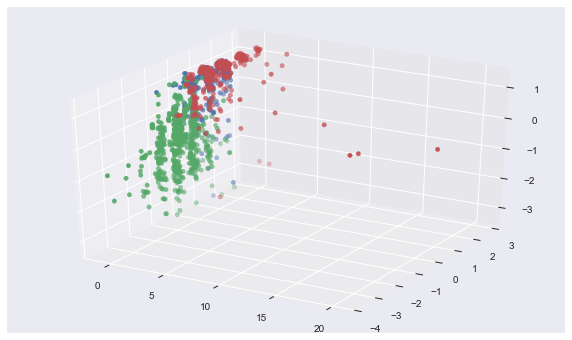

In [569]:
#show a 3D plot of clusters
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

for i in range(3):
    ax.scatter(num_scaled[clusters ==i,0], num_scaled[clusters ==i,1], num_scaled[clusters ==i,2])

In [570]:
# Add a cluster column to the data frame to see which properties(houses) are in which cluster
house['cluster'] = clusters
house.head()

,LotArea,LandSlope,PropType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,TotalBsmtSF,Heating,CentralAir,FullBath,HalfBath,Bedrooms,KitQual,GarageCars,PoolArea,YrSold,SalePrice,cluster
0,8450,Gtl,1Fam,2Story,7,2003,2003,Gable,856,GasA,1,2,1,3,Gd,2,0,2008,208500,0
1,9600,Gtl,1Fam,1Story,6,1976,1976,Gable,1262,GasA,1,2,0,3,TA,2,0,2007,181500,2
2,11250,Gtl,1Fam,2Story,7,2001,2002,Gable,920,GasA,1,2,1,3,Gd,2,0,2008,223500,0
3,9550,Gtl,1Fam,2Story,7,1915,1970,Gable,756,GasA,1,1,0,3,Gd,3,0,2006,140000,1
4,14260,Gtl,1Fam,2Story,8,2000,2000,Gable,1145,GasA,1,2,1,4,Gd,3,0,2008,250000,0


In [571]:
# Calculate cluster means
house.groupby('cluster').mean()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,CentralAir,FullBath,HalfBath,Bedrooms,GarageCars,PoolArea,YrSold,SalePrice
cluster,,,,,,,,,,,,,
0,10381.583099,6.712676,1990.219718,1996.287324,929.608451,0.991549,1.929577,0.971831,3.250704,2.101408,0.000000,2007.692958,208485.721127
1,9234.386034,5.166008,1950.822134,1972.674572,881.305665,0.878788,1.192358,0.194993,2.766798,1.335968,0.000000,2007.868248,130819.350461
2,13271.023599,7.516224,1997.144543,2000.141593,1565.882006,1.000000,2.008850,0.182891,2.669617,2.377581,0.000000,2007.849558,262016.690265
3,23047.285714,7.571429,1973.857143,1987.714286,2013.000000,1.000000,2.000000,0.571429,3.714286,2.000000,575.428571,2006.714286,288138.571429


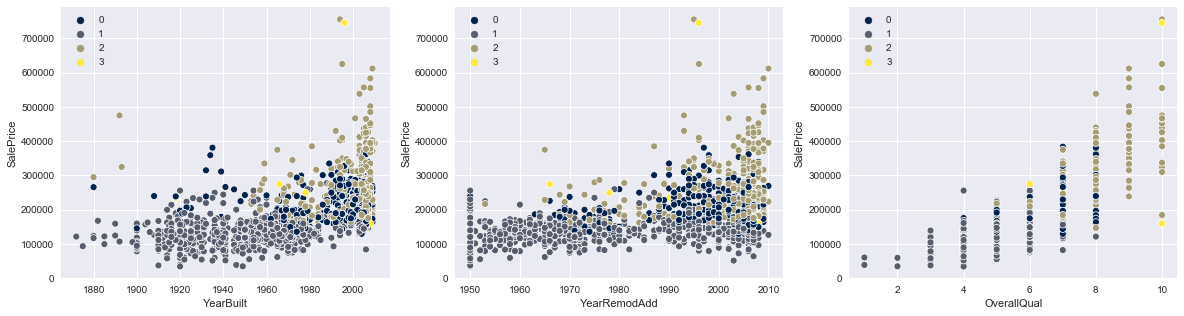

In [573]:
# Draw bi-variate scatter plots to visualize the 6 clusters in pairs
fig, ax  = plt.subplots(1,3,figsize=(20,5))
sns.scatterplot(house['YearBuilt'], house['SalePrice'], hue=clusters, ax=ax[0], palette='cividis');
sns.scatterplot(house['YearRemodAdd'], house['SalePrice'], hue=clusters, ax=ax[1], palette='cividis');
sns.scatterplot(house['OverallQual'], house['SalePrice'], hue=clusters, ax=ax[2], palette='cividis');

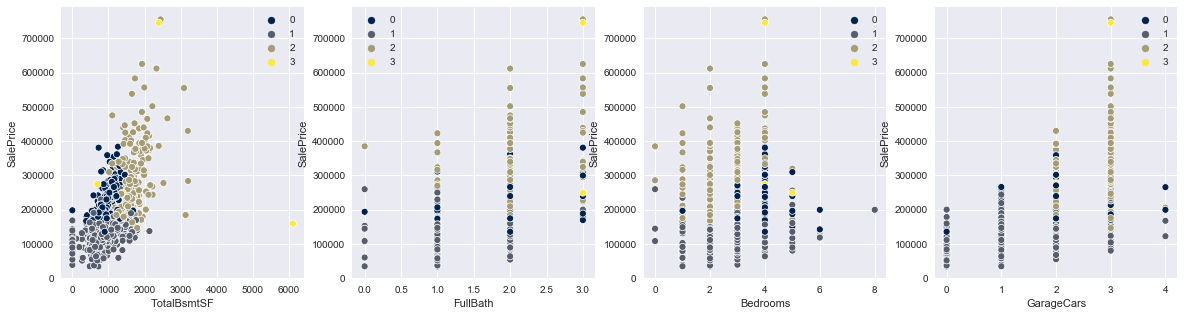

In [574]:
# Draw bi-variate scatter plots
fig, ax  = plt.subplots(1,4,figsize=(20,5))
sns.scatterplot(house['TotalBsmtSF'], house['SalePrice'], hue=clusters, ax=ax[0], palette='cividis');
sns.scatterplot( house['FullBath'], house['SalePrice'], hue=clusters, ax=ax[1], palette='cividis');
sns.scatterplot(house['Bedrooms'], house['SalePrice'], hue=clusters, ax=ax[2], palette='cividis');
sns.scatterplot(house['GarageCars'], house['SalePrice'], hue=clusters, ax=ax[3], palette='cividis');

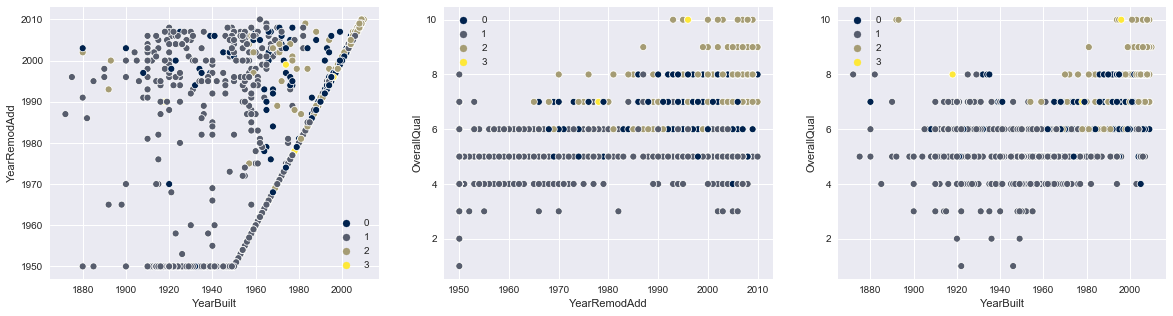

In [575]:
# Draw bi-variate scatter plots
fig, ax  = plt.subplots(1,3,figsize=(20,5))
sns.scatterplot(house['YearBuilt'], house['YearRemodAdd'], hue=clusters, ax=ax[0], palette='cividis');
sns.scatterplot(house['YearRemodAdd'], house['OverallQual'], hue=clusters, ax=ax[1], palette='cividis');
sns.scatterplot(house['YearBuilt'], house['OverallQual'], hue=clusters, ax=ax[2], palette='cividis');

In [576]:
house[['OverallQual','YearBuilt', 'YearRemodAdd','TotalBsmtSF', 'FullBath','HalfBath', 'Bedrooms', 'GarageCars', 'SalePrice']].corr().style.background_gradient(cmap='coolwarm')
#house[['LotArea', 'OverallQual','YearBuilt', 'YearRemodAdd','TotalBsmtSF', 'FullBath','Bedrooms', 'GarageCars', 'SalePrice']].corr()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,FullBath,HalfBath,Bedrooms,GarageCars,SalePrice
OverallQual,1,0.572323,0.550684,0.537808,0.5506,0.273458,0.101676,0.600671,0.790982
YearBuilt,0.572323,1,0.592855,0.391452,0.468271,0.242656,-0.0706512,0.53785,0.522897
YearRemodAdd,0.550684,0.592855,1,0.291066,0.439046,0.183331,-0.0405809,0.420622,0.507101
TotalBsmtSF,0.537808,0.391452,0.291066,1,0.323722,-0.0488037,0.05045,0.434585,0.613581
FullBath,0.5506,0.468271,0.439046,0.323722,1,0.136381,0.363252,0.469672,0.560664
HalfBath,0.273458,0.242656,0.183331,-0.0488037,0.136381,1,0.226651,0.219178,0.284108
Bedrooms,0.101676,-0.0706512,-0.0405809,0.05045,0.363252,0.226651,1,0.0861064,0.168213
GarageCars,0.600671,0.53785,0.420622,0.434585,0.469672,0.219178,0.0861064,1,0.640409
SalePrice,0.790982,0.522897,0.507101,0.613581,0.560664,0.284108,0.168213,0.640409,1


In [577]:
#Create a pivot table for visualization
house.pivot_table(values=['SalePrice', 'YearBuilt', 'LotArea', 'OverallQual', 'YearRemodAdd',
                                  'TotalBsmtSF', 'CentralAir', 'FullBath', 'HalfBath',
                                  'Bedrooms', 'GarageCars', 'PoolArea'], index='cluster', aggfunc=np.mean)

,Bedrooms,CentralAir,FullBath,GarageCars,HalfBath,LotArea,OverallQual,PoolArea,SalePrice,TotalBsmtSF,YearBuilt,YearRemodAdd
cluster,,,,,,,,,,,,
0,3.250704,0.991549,1.929577,2.101408,0.971831,10381.583099,6.712676,0.000000,208485.721127,929.608451,1990.219718,1996.287324
1,2.766798,0.878788,1.192358,1.335968,0.194993,9234.386034,5.166008,0.000000,130819.350461,881.305665,1950.822134,1972.674572
2,2.669617,1.000000,2.008850,2.377581,0.182891,13271.023599,7.516224,0.000000,262016.690265,1565.882006,1997.144543,2000.141593
3,3.714286,1.000000,2.000000,2.000000,0.571429,23047.285714,7.571429,575.428571,288138.571429,2013.000000,1973.857143,1987.714286


### <span style = 'color: brown'> *4. Conclusion and Recomendations* <span/>
    Add a markdown cell at the end of the notebook in which you should write a brief conclusion describing what the business question/s were (or purpose of this analysis was) and how your analysis answers those questions.

Ho: The year built, remodeling year, year sold, the lot area, the overal quality, the number of bedrooms, fullbath, halfbath, gargare cars, and the pool area are highly corelated with the sale price.
Based on the test result, P-value = 0.00, which means that the test hypothesis is false or should be rejected because P ≤ 0.05. This could be explained by there are some unusual values that make requires more data in order to explain it such as housing market, economic, location, rating and other factors.
Compared to a model with additional input variables, we get adjusted R-squared is 0.743, which indicates that the additional input variables are adding value to the model since the adj. r-squared is high.

Based on the 4 clusters, we can say the cluster number 3 has the highest selling price, although its YearBuilt is older than clusters 0 and 2. The lowest selling price is cluster 1, where it has the lowest overal quality as well as other main trigger factors.  

In [ ]:
#import python modules (incluing Patsy- Python library for describing statistical models) and given alias 
#enables matplotlib to display the graphical output of the code in the notebook environment
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import numpy as np
import patsy from statsmodels.graphics.correlation
import plot_corr from sklearn.model_selection 
import train_test_split
plt.style.use('seaborn')